<a href="https://colab.research.google.com/github/walleford/walleford/blob/main/SeminarWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
In this workbook we will go over an introduction of TensorFlow and how you can quickly import and implement the tool in your Python environment.

## Setup
If not already installed, you will need to pip install TensorFlow:

In [ ]:
pip install tensorflow

Once this is completed (or if the requirement is already satisfied), then you will need to import tensorflow into your Python script/environment.

In [2]:
import tensorflow as tf # import it as tf so you don't have to call it with the full name every time

## Introduction to Tensors
Tensors are multi-dimensional arrays with a uniform type (dtype). There are many types of tensors:
* float32, int32, string, etc...

Tensors are very similar to numpy arrays (np.arrays). They are the objects passed around and manipulated when creating and training models using TensorFlow.

In [3]:
string = tf.Variable("this is a string", tf.string) # along with declaring the variable, you have to declare the type
number = tf.Variable(42, tf.int16) # integer

Tensors have what is known as a rank: the number of dimensions of the tensor.

In [6]:
one_dimension_tensor = tf.Variable(["one dimension"], tf.string)
print(tf.rank(one_dimension_tensor))
two_dimension_tensor = tf.Variable([["one dimension", "one dimension"], ["two dimensions", "two dimensions"]], tf.string)
print(tf.rank(two_dimension_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


# Keras for Machine Learning
Keras is the high level api utilized with TensorFlow in order to solve ML problems with a focus on modern deep learning. Keras covers every step from preprocessing to deployment.

## Creating Your First Machine Learning Model
To build the machine learning model with Keras we will use the MNIST dataset that contains a 28x28 pixel image with each pixel containing a value from 0 to 255 representing the gray-scale of the pixel. These images contain handwritten numbers and our model will classify the numbers.

In [7]:
mnist = tf.keras.datasets.mnist
# next we will load the training/testing data with a built in function
# x here stands for the images while y stands for the labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# To scale our data into the range of [0,1] we will divide everything by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Once these are loaded, we can visualize one image to make sure we have the correct data:

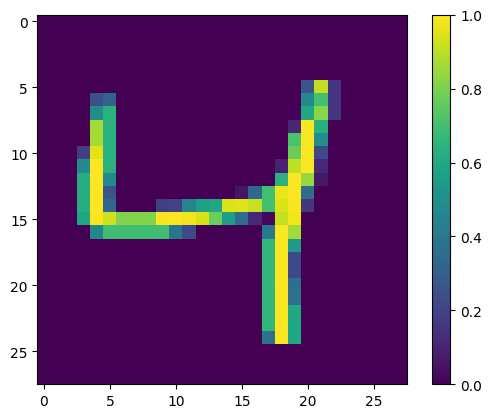

The label for this image is: 4


In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.show()
print(f"The label for this image is: {y_train[2]}")

Now we will declare/build our keras model utilizing a sequential model. A sequential model is a type of feed-forward neural network. Our first layer will take the two-dimensional input of a 28x28 array into a single dimension vector of 784 input neurons for the network. The second layer is a dense layer (every neuron from the previous layer connects directly to every neuron from the last layer) and has 128 neurons. The third layer is a dense layer as well and has 10 output neurons.

In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

Now that the model is built, we must compile the model with a specified optimizer, loss function, and metric to be evaluated. The loss function we will use is the SparseCategoricalCrossentropy function. This function computes the crossentropy loss between labels and predictions and is used when there are more than 2 label classes to predict.

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Finally, we fit our model with our training data and labels to see its accuracy rate.

In [14]:
model.fit(
    x_train, y_train,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9859


Once the model is fitted we can run the tests throught the model to evaluate its actual accuracy.

In [15]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0734 - accuracy: 0.9769 - 601ms/epoch - 2ms/step


[0.07341305911540985, 0.9768999814987183]

You can see the accuracy for this model is 97.69% accurate.

## Conclusion
In this demo we utilized TensorFlow and the keras API to build a feed-forward neural network to perform classification tasks on a dataset containing handwritten numbers.

References:

https://www.tensorflow.org/tutorials/quickstart/beginner

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

https://developers.google.com/machine-learning/glossary